# Presentation Python Spectroscopy Tools

+ Problem: Analyzing Spectroscopy data can be tedious and time consuming.
+ Commercial Software: Origin, OMNIC Paradigm (Thermo Scientific), MicroLab FTIR Software (Agilent)


We want a simple and easy toolbox which should:

+ read-in spectroscopy data
+ make interactive visualization possible
+ perform various kinds of analysis procedures (Baseline Fitting, Deconvolution, Annotation)
+ import data from Molpro calculations

In [1]:
from modules import spec_tools

## Basic Structure

**spec_tools.py** has three main classes:

+ Spectrum: The main class for plotting and visualization
+ Baseline: Class which contains methods for baseline fitting
+ Deconvolution: Has methods for peak fitting and deconvolution



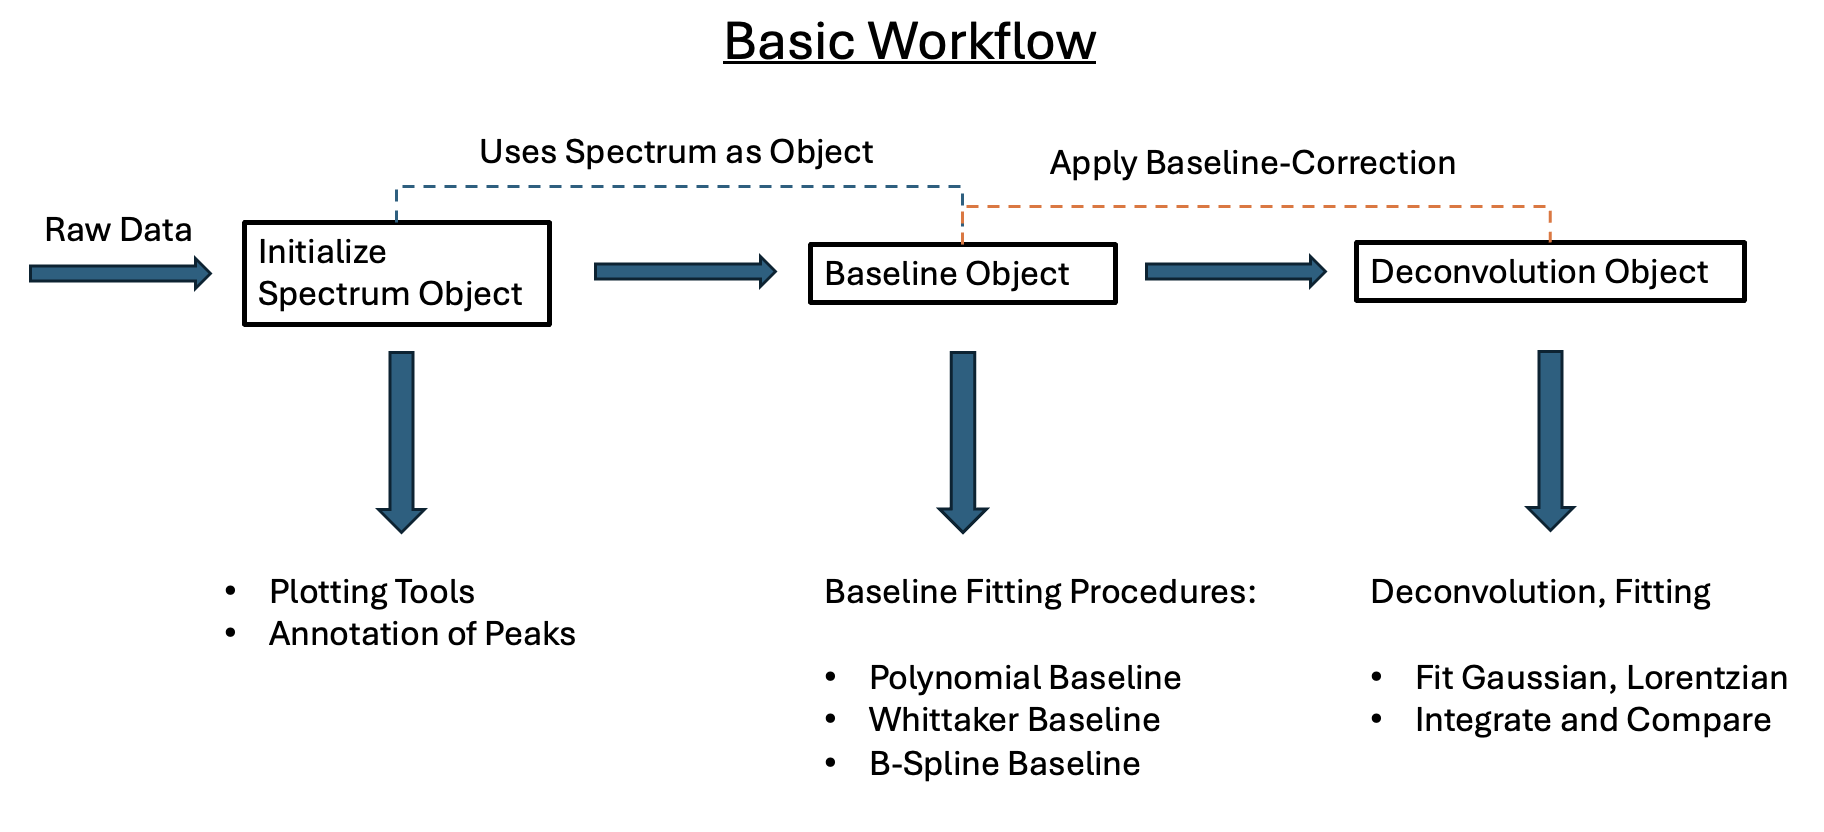

### Basic Plotting Procedures

**Vega-Altair** is used as a statistical visualization library.

Other possibilities and libraries are:

+ Matplotlib (static, not interactive)
+ Seaborn (similar to Matplotlib not interactive)
+ Plotly (interactive, build on Javascript library)
+ bokeh (interactive, similar to vega)

In [2]:
spectrum_n2o = spec_tools.Spectrum.from_csv("n2o_spectrum.csv",sep=";",comma=",",header=0)
spectrum_n2o.plot_spectrum(title="N2O Spectrum")

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [3]:
# Select Spectral Window for Plotting

window = [2176, 2215]

spectrum_n2o.plot_spectral_window(window[0],window[1],title="N2O Spectrum (2170-2215 cm-1)")

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

### Importation of VCI-Calculation Data

using the function **import_vci_prediction** the calculated fundamentals, overtones and combination bands can be imported into the spectrum

The user here has the ability to select fundamentals, overtones and combinations via the **mode** parameter

+ mode = 1: only fundamentals
+ mode = 2: fundamentals and overtones
+ mode = 3: fundamentals, overtones and combinations

In [4]:
spectrum_n2o.import_vci_prediction("446.out")
print(spectrum_n2o.annotations)

spectrum_n2o.plot_spectrum_with_vci_annotations(title="N2O VCI Prediction",mode=2)

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


{'fundamentals': {'|ν₄¹>': {'Symmetry': 'A1', 'E_abs': '4612.17', 'VCI_freq': '2231.58', 'IR_intensity': '566.76'}, '|ν₃¹>': {'Symmetry': 'A1', 'E_abs': '3671.09', 'VCI_freq': '1290.50', 'IR_intensity': '108.01'}, '|ν₂¹>': {'Symmetry': 'E1', 'E_abs': '2973.99', 'VCI_freq': '593.40', 'IR_intensity': '8.66'}, '|ν₁¹>': {'Symmetry': 'E1', 'E_abs': '2973.99', 'VCI_freq': '593.40', 'IR_intensity': '8.66'}}, 'overtones': {'|ν₄²>': {'Symmetry': 'A1', 'E_abs': '6814.38', 'VCI_freq': '4433.80', 'IR_intensity': '1.32'}, '|ν₃²>': {'Symmetry': 'A1', 'E_abs': '4955.78', 'VCI_freq': '2575.19', 'IR_intensity': '14.54'}, '|ν₂²>': {'Symmetry': 'A1', 'E_abs': '3568.57', 'VCI_freq': '1187.98', 'IR_intensity': '0.00'}, '|ν₁²>': {'Symmetry': 'A1', 'E_abs': '3568.57', 'VCI_freq': '1187.98', 'IR_intensity': '0.00'}, '|ν₃¹>': {'Symmetry': '4^1', 'E_abs': 'A1', 'VCI_freq': '5875.25', 'IR_intensity': '3494.66'}, '|ν₂¹>': {'Symmetry': '3^1', 'E_abs': 'E1', 'VCI_freq': '4271.56', 'IR_intensity': '1890.97'}, '|ν₁¹>

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/c

alt.LayerChart(...)

### Inputing Annotations

Using the **initialize_annotation_dict()** function a empty annotation dictionary is returned

Currently three types of annotations are supported:

+ Chemist notation (principal motion pattern)
+ Spectroscopist's notation (symmetry-based)
+ Physicist notation (quantum mechanical information)



In [5]:
annotation = spec_tools.Spectrum.initialize_annotation_dict()

In [6]:
print(annotation)

# Clear Annotations
spectrum_n2o.clear_annotations()

# Add Annotation

annotation["freq"] = 2231.0
annotation["group"] = "NO"
spectrum_n2o.add_annotation(annotation,num=1)

# Add second one

annotation2 = annotation.copy()
annotation2["freq"] = 3490.0
annotation2["group"] = "NO"
spectrum_n2o.add_annotation(annotation2,num=2)


print(spectrum_n2o.annotations)


{'vib_type': 'ν', 'freq': None, 'group': None, 'description': None}
Current annotations cleared
Annotation added to spectrum object
Annotation added to spectrum object
{1: {'vib_type': 'ν', 'freq': 2231.0, 'group': 'NO', 'description': None}, 2: {'vib_type': 'ν', 'freq': 3490.0, 'group': 'NO', 'description': None}}


In [7]:
# Plotting Spectrum with Annotations

spectrum_n2o.plot_annotations_user()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

### Integration Tools

Using the **interactive_inegration** method the user is able to select the interval he wants to integrate.

The integration is based on the trapezoidal rule.

\begin{equation}
\int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} \frac{f(x_{i-1}) + f(x_{i})}{2} \cdot \Delta x
\end{equation}

In [8]:
# Split the spectrum using the window

window = [2170, 2216]

# This creates a new Specturm object
spectrum_n20_window = spectrum_n2o.split_spectral_window(window)
spectrum_n20_window.interactive_integration()

alt.LayerChart(...)

In [9]:
# Another way is to select multiple spectal windows

windows = [[2202,2215],[2178,2194]]

chart, area = spectrum_n2o.integrate_multiple_spectral_windows(ls_of_windows=windows)
chart

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)

### Baseline Correction

A range of different techniques are currently implemented in the tool:

+ Polynomial Baselines 
+ Whittaker Baselines
+ Spline Baselines


All the methods can be used when initializing a Baseline Object

In [10]:
spectrum_baseline_fitting = spectrum_n2o.split_spectral_window([2200,2215])

In [11]:
Baseline1 = spec_tools.Baseline(spectrum_baseline_fitting)

#### Polynomial Baselines

A polynomial is given by 

\begin{align*}
y = a_0 + a_1 x + ... + a_k x^k
\end{align*}

The squared residuals can be calculated with respect to the data $(x_i,y_i)$

\begin{align*}
R^2 = \sum_{i=1}^n [y_i  - (a_0 + a_1 x_i + ... + a_k x_i^k)]^2
\end{align*}

By evaluating the partial derivatives

\begin{align*}
\frac{\partial R^2}{\partial a_0} = -2 \sum_{i=1}^n [y_i - (a_0 + a_1 x_i + ... + a_k x_i^k)] = 0 \\
... \\
\frac{\partial R^2}{\partial a_1} = -2 \sum_{i=1}^n [y_i - (a_0 + a_1 x_i + ... + a_k x_i^k)] x_i = 0 \\
\end{align*}

This can be then written in matrix form

\begin{align*}
\begin{pmatrix} 
n & \sum x_i & ... & \sum x_i^k \\
\sum x_i & \sum x_i^2 & ... & \sum x_i^{k+1} \\
... & ... & ... & ... \\
\sum x_i^k & \sum x_i^{k+1} & ... & \sum x_i^{2k}
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
... \\
a_k \end{pmatrix}
=
\begin{pmatrix}
\sum y_i \\
\sum y_i x_i \\
... \\
\sum y_i x_i^k
\end{pmatrix}
\end{align*}

Which is a Vandermonde Matrix, In martrix notation one gets

\begin{align*}
\mathbf{X} \mathbf{a} = \mathbf{y}
\end{align*}

By multiplying with the Transpose we can get the numerical solution vector:

\begin{align*}
a = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}


In [12]:
fit, params = Baseline1.fit_baseline_poly(p=2)

Baseline1.plot_baseline_and_spectrum(title="Polynomial Baseline Fit")

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

#### Whittaker Baselines

Whittaker-Smoothing based algorithms are penalized least squares methods.

If we want to fit a smooth series $z$ to $y$ we have to balance two conflicting goals:

1. fidelity of the data
2. roughness of $z$

The smoother $z$ is the more it deviates from $y$. Roughness is expressed with differences:

\begin{align*}
\Delta z_i = z_i - z_{i-1} \Rightarrow R = \sum_i (\Delta z_i)^2
\end{align*}

The lack of fit can be calculated with the squared residuals:

\begin{align*}
S = \sum_i (y_i - z_i)^2
\end{align*}

One now aims to minimize the following function:

\begin{align*}
Q = S + \lambda R
\end{align*}

Where $\lambda$ is a smoothing parameter chosen by the user.

In matrix form:

\begin{align*}
Q = ||\mathbf{y} - \mathbf{z}||^2 + \lambda ||\mathbf{D} \mathbf{z}||^2
\end{align*}

Where $\mathbf{D}z = \Delta z$ is a difference matrix.



In [13]:
lam = 1e4
tol = 1e-6
max_iter = 1000

fit, params = Baseline1.fit_baseline_asls(lam=lam,tol=tol,max_iter=max_iter)

Baseline1.plot_baseline_and_spectrum(title="ASLS Baseline Fit")

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

#### Spline Baseline Fitting

Basic Idea of Spline Interpolation:

> Interpolating function are a set of piecewise polynomials which are connected at the knots.

We consider points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial

\begin{align*}
S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i
\end{align*}

To find the interpolating function we need to determine the coefficients $a_i,b_i,c_i,d_i$, for $i=1,...,n-1$.

$n$ points give $n-1$ functions and $4(n-1)$ coefficients.

The functions have to satisfy the following conditions:

1. $S_i(x_i) = y_i ~ i=1,...,n-1$
2. $S_i(x_{i+1}) = y_{i+1} ~ i=1,...,n-1$

Constraint to have continous first an second derivatives

3. $S'_i(x_{i+1}) = S'_{i+1}(x_{i+1}) ~ i=1,...,n-2$
4. $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1}) ~i=1,...,n-2$

Which gives us a total of $2(n-2)$ equations. The final two equations can be obtained by constraints: 

1. natural
2. clamped
3. periodic



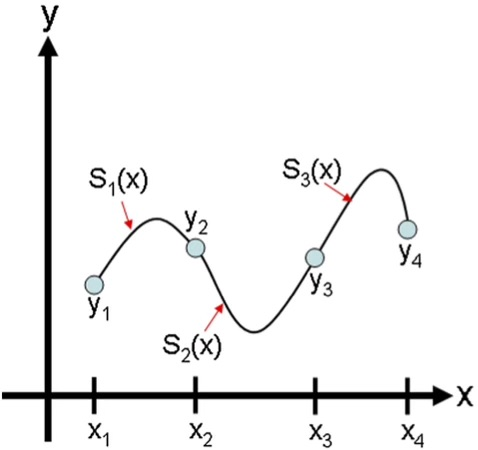

In [14]:
lam = 1e5
knots = 100
degree = 3
max_iter = 100

fit, params = Baseline1.fit_baseline_irsqs(lam=lam,knots=knots,degree=degree,max_iter=max_iter)

In [15]:
Baseline1.plot_baseline_and_spectrum(title="IRSQS Baseline Fit")

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

In [16]:
spectrum_baseline_corr = Baseline1.substract_baseline()

# User can define a threshold for peak detection
chart, peaks = spectrum_baseline_corr.plot_spectrum_peak_picking(title="Baseline-Corrected with Peak Picking",threshold=0.002)

chart

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

### Peak Deconvolution:

> Deconvolution here describes the process of separating peaks that overlap in the spectrum.

In the current implementation one can use following peak models:

**Gaussian**

\begin{align*}
G(x,\omega,\sigma,A)= A \exp \left( -\frac{1}{2} \left( \frac{x-\omega}{\sigma} \right)^2 \right)
\end{align*}

**Lorentzian**

\begin{align*}
L(x, \omega, \gamma, A) = \frac{A \gamma}{\pi} \left( \frac{1}{(x-\omega)^2 + \gamma^2} \right)
\end{align*}

**Voigt**

\begin{align*}
V(x, \omega, \sigma, \gamma) = \int_{-\infty}^{\infty} G(x',\omega,\sigma) L(x-x',\omega,\gamma) dx'
\end{align*}

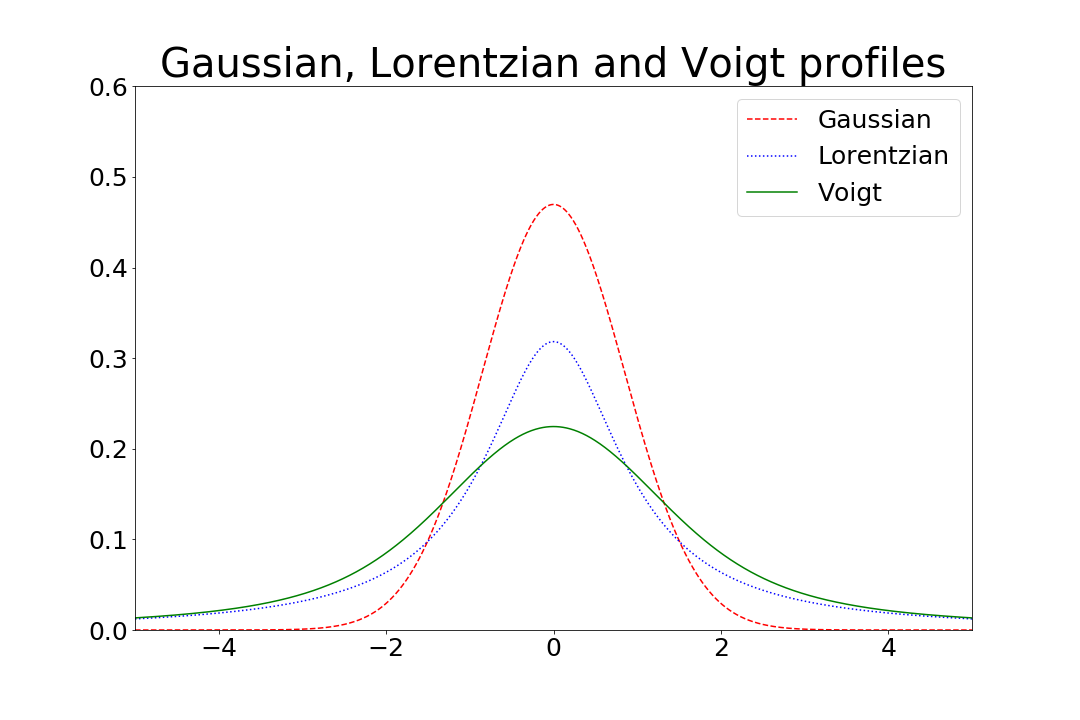

In [17]:
Deconvolution1 = spec_tools.Deconvolution(spectrum_baseline_corr,peaks)

Deconvolution1.fit_multiple_gaussians_and_plot(broadness=5)


/opt/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

In [18]:
integrals, annotation = Deconvolution1.calculate_integral_of_fits()

Deconvolution1.barplot_integrals(annotation)

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)